In [104]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report , ConfusionMatrixDisplay , accuracy_score , roc_auc_score , f1_score

import warnings
warnings.filterwarnings("ignore")

In [105]:
mushrooms = pd.read_csv("Data/mushrooms.csv")

In [106]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [107]:
mushrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [108]:
mushrooms.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [109]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [110]:
mushrooms.duplicated().sum()

np.int64(0)

In [111]:
pd.concat(
    {
        "Unique Values" : mushrooms.apply(pd.unique) , 
        "Counts" : mushrooms.nunique()
    } , axis=1
)

,Unique Values,Counts
class,"[p, e]",2
cap-shape,"[x, b, s, f, k, c]",6
cap-surface,"[s, y, f, g]",4
cap-color,"[n, y, w, g, e, p, b, u, c, r]",10
bruises,"[t, f]",2
odor,"[p, a, l, n, f, c, y, s, m]",9
gill-attachment,"[f, a]",2
gill-spacing,"[c, w]",2
gill-size,"[n, b]",2
gill-color,"[k, n, g, p, w, h, u, e, b, r, y, o]",12


* **Missing Values**

In [112]:
print(mushrooms["stalk-root"].value_counts())

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64


In [113]:
mushrooms["stalk-root"] = mushrooms["stalk-root"].str.strip()

category_counts = mushrooms[mushrooms["stalk-root"] != "?"]["stalk-root"].value_counts()
category_ratios = category_counts / category_counts.sum()

total_missing = (mushrooms["stalk-root"] == "?").sum()

fill_values = np.random.choice(category_ratios.index, size=total_missing, p=category_ratios.values)

mushrooms.loc[mushrooms["stalk-root"] == "?", "stalk-root"] = fill_values


In [114]:
mushrooms["stalk-root"].value_counts()

stalk-root
b    5442
e    1645
c     767
r     270
Name: count, dtype: int64

* **Drop the veil-typecolumns**

In [115]:
mushrooms["veil-type"].value_counts()

veil-type
p    8124
Name: count, dtype: int64

In [116]:
mushrooms.drop("veil-type" , axis=1 , inplace=True)

* **New Mushrooms Values**

In [117]:
pd.concat(
    {
        "Unique Values" : mushrooms.apply(pd.unique) , 
        "Counts" : mushrooms.nunique()
    } , axis=1
)

,Unique Values,Counts
class,"[p, e]",2
cap-shape,"[x, b, s, f, k, c]",6
cap-surface,"[s, y, f, g]",4
cap-color,"[n, y, w, g, e, p, b, u, c, r]",10
bruises,"[t, f]",2
odor,"[p, a, l, n, f, c, y, s, m]",9
gill-attachment,"[f, a]",2
gill-spacing,"[c, w]",2
gill-size,"[n, b]",2
gill-color,"[k, n, g, p, w, h, u, e, b, r, y, o]",12


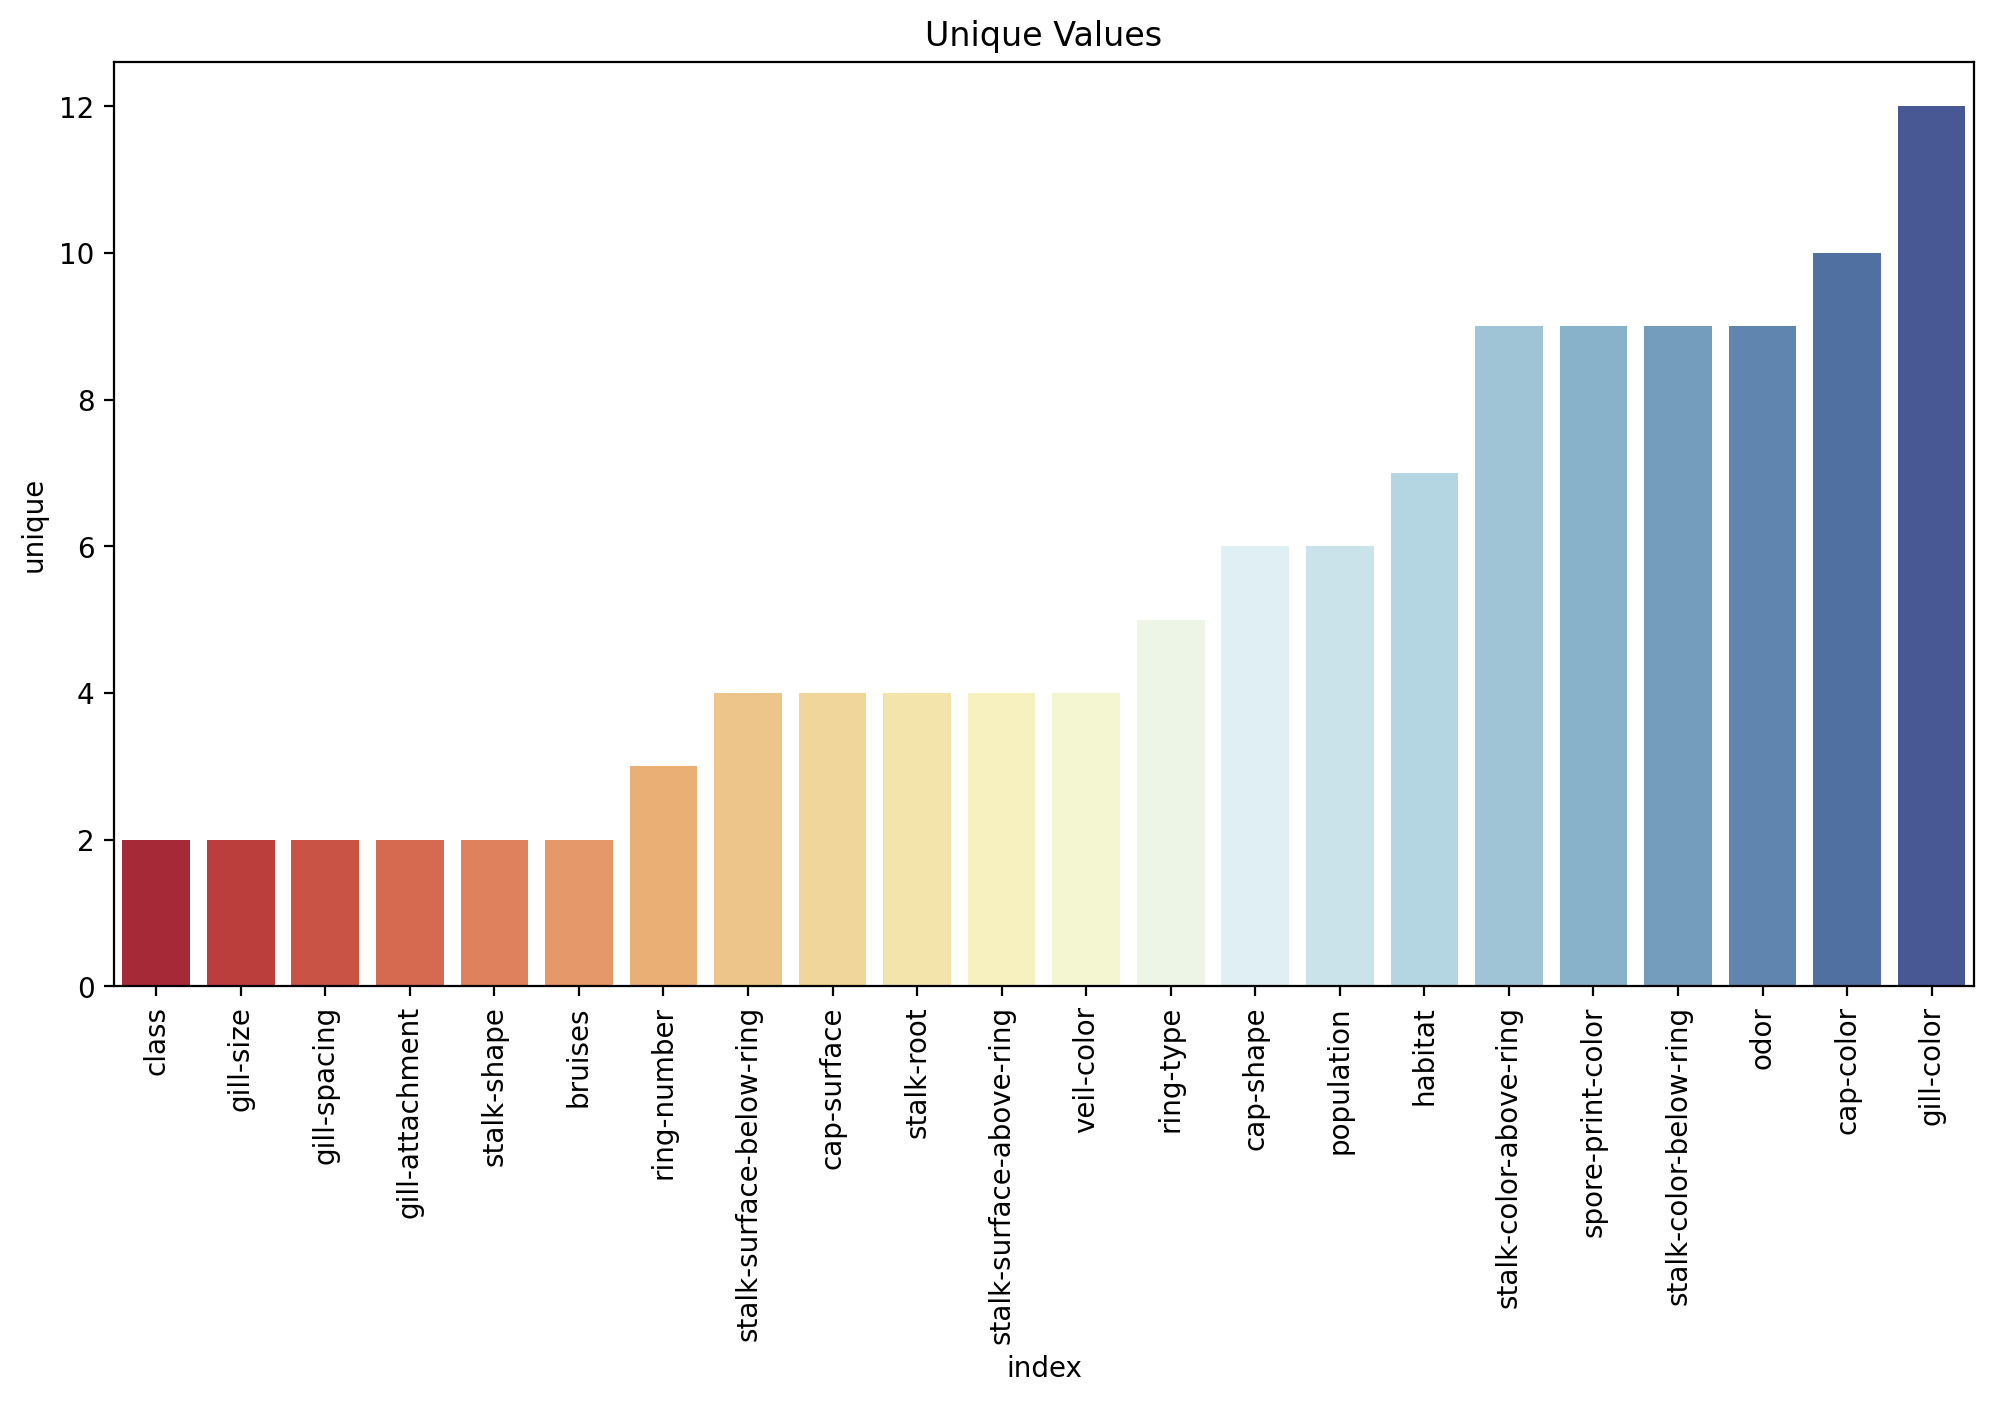

In [118]:
plt.figure(figsize=(12,6) , dpi=200)

sns.barplot(data=mushrooms.describe().transpose().reset_index().sort_values("unique") 
            , x="index" , y="unique" , palette="RdYlBu")
plt.title("Unique Values")
plt.xticks(rotation = 90);

In [119]:
mushrooms.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


#### EDA

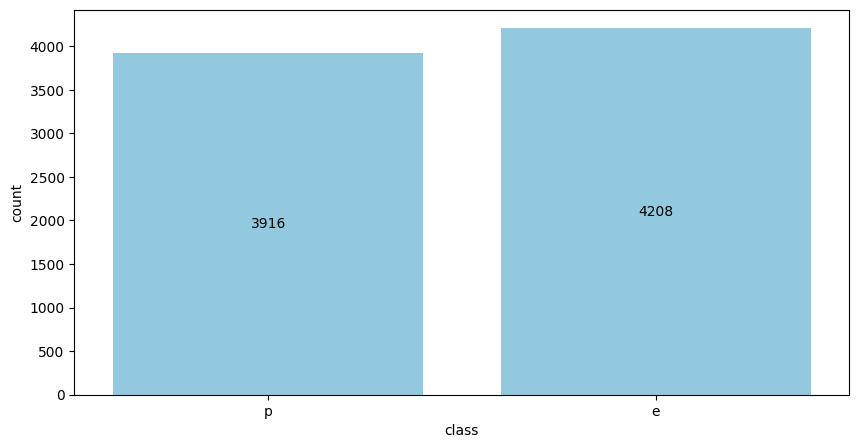

In [120]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=mushrooms["class"] , color="skyblue")

for i in ax.containers:
    ax.bar_label(i , label_type="center" , color = "black") 

In [122]:
firs10 = mushrooms[["cap-shape" , "cap-surface" , "cap-color" , "bruises" , "odor" , "gill-attachment" 
                    , "gill-spacing" , "gill-size" , "gill-color" , "stalk-shape" ]]

second11 = mushrooms[["stalk-root" , "stalk-surface-above-ring" , "stalk-surface-below-ring" , "stalk-color-above-ring" , "stalk-color-below-ring" , "veil-color" , "ring-number" , "ring-type" ,"spore-print-color" , "population" , "habitat" ]]

In [123]:
def count(data):
    plt.figure(figsize=(25,25) , dpi=300)

    for i , column in enumerate(data.columns):
        plt.subplot(4, 3 , i+1)

        sns.countplot(x = column , data=data , palette="RdYlBu")
        plt.title(f"{column}")

    plt.tight_layout()
    plt.show()


count(firs10)

In [124]:
count(second11)

* **Class & Colums**

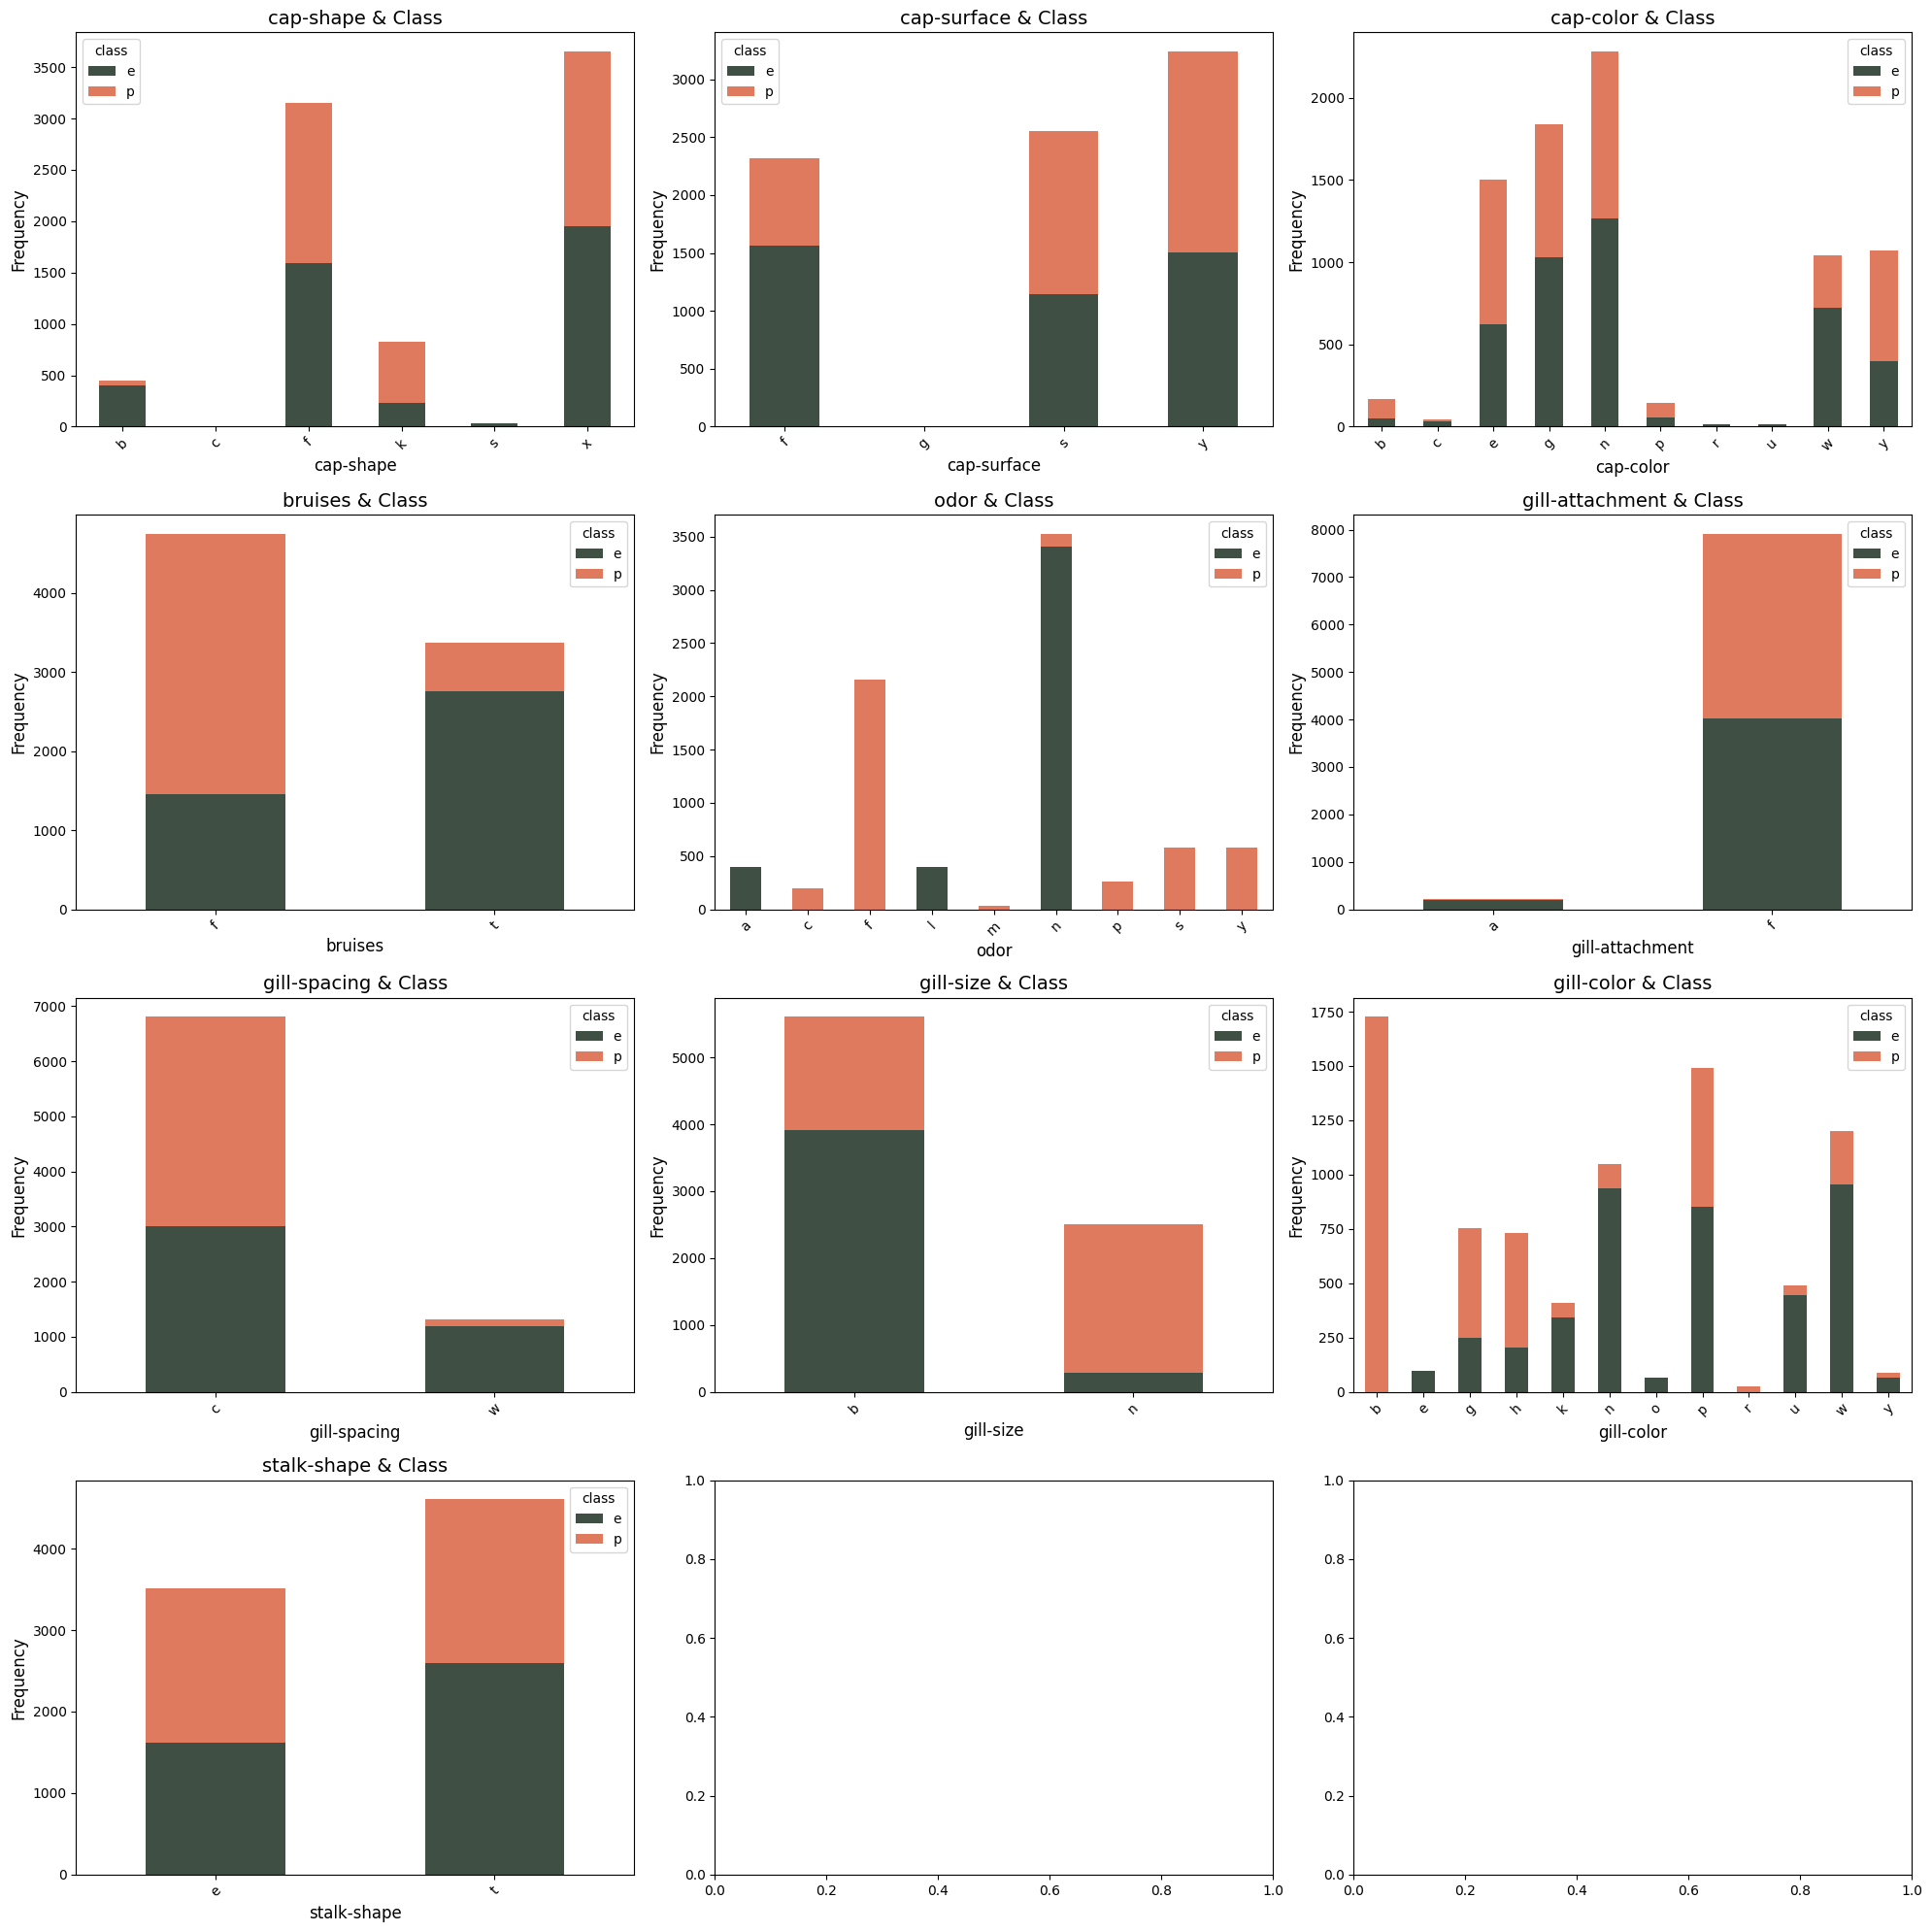

In [125]:
from matplotlib.colors import LinearSegmentedColormap

def clustor(data):
    
    fig, axes = plt.subplots(4, 3, figsize=(20, 20))

    axes = axes.flatten()

    for i, col in enumerate(data.columns):
        ax = axes[i]

        # color 
        custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#3F4F44", "#E07A5F"])

        crosstab_data = pd.crosstab(data[col], mushrooms["class"])

        crosstab_data.plot(kind="bar", stacked=True, colormap=custom_cmap, ax=ax)

        ax.set_title(f"{col} & Class", fontsize=14)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)
        ax.tick_params(axis="x", rotation=45)  

   
    plt.tight_layout()
    plt.show()

clustor(firs10)


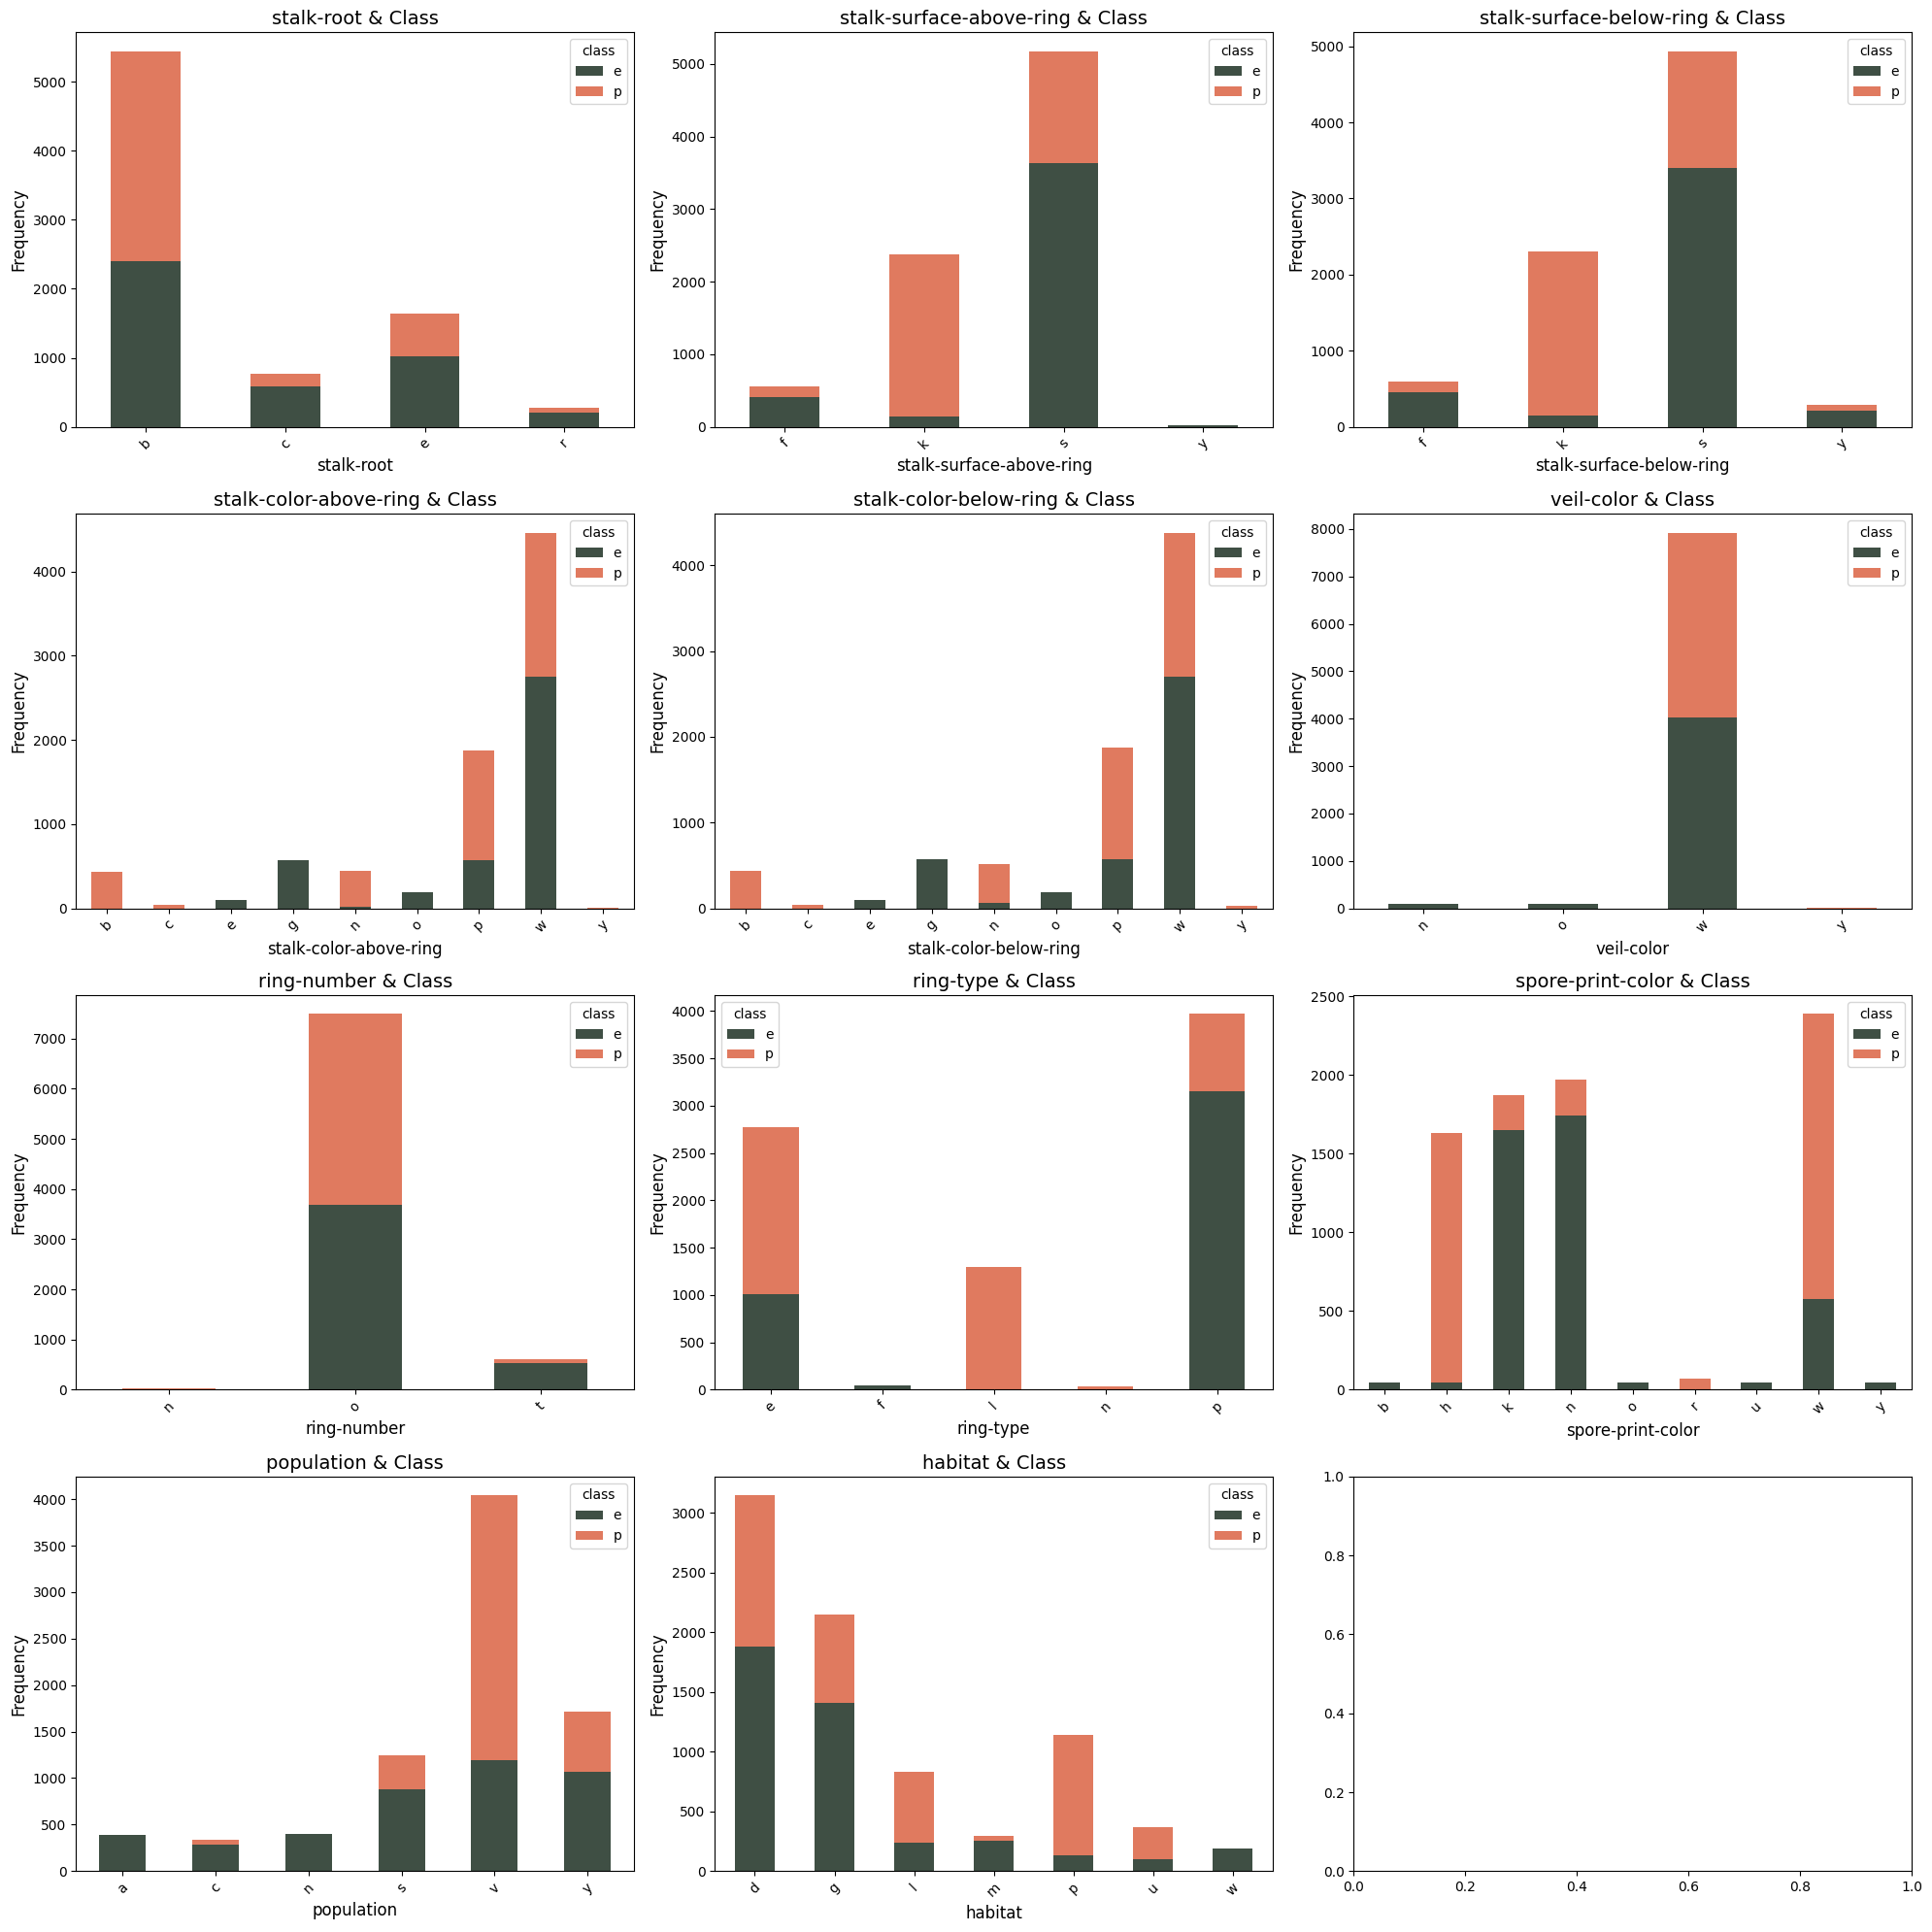

In [126]:
clustor(second11)

* **Label Encoding**

In [127]:
mushrooms_dummies = mushrooms.copy() #for get dummies 

In [128]:
from sklearn.preprocessing import LabelEncoder

for i in mushrooms.columns:
    label = LabelEncoder()
    mushrooms[i] = label.fit_transform(mushrooms[i])

<Axes: >

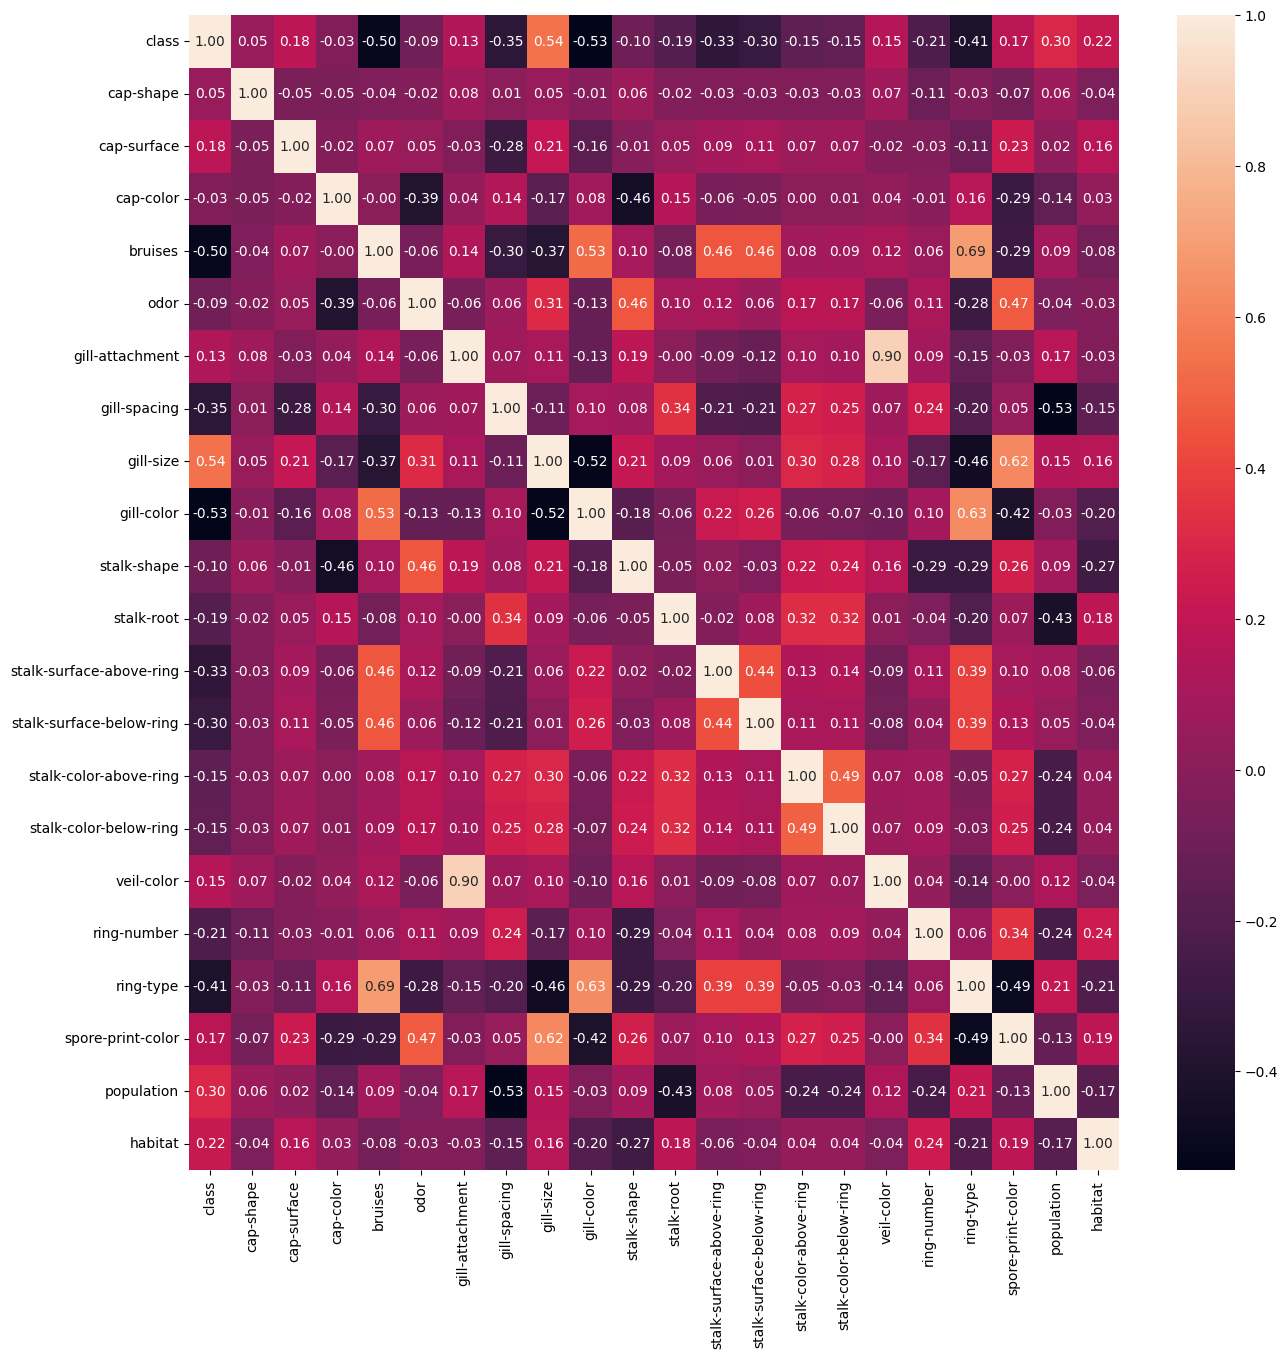

In [153]:
plt.figure(figsize=(15,15))
sns.heatmap(mushrooms.corr() , annot=True , fmt=".2f")

In [130]:
X = mushrooms.drop("class" , axis=1)
y = mushrooms[["class"]]

In [131]:
X.head(3)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3


In [132]:
y.head(3)

,class
0,1
1,0
2,0


In [133]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.2 , random_state=42 , stratify=mushrooms["class"])

#### AdaBoost Model

In [134]:
Adamodel = AdaBoostClassifier(n_estimators=3 , algorithm="SAMME") 
Adamodel.fit(X_train , y_train)
y_pred = Adamodel.predict(X_test)

In [135]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       842
           1       0.95      0.74      0.83       783

    accuracy                           0.86      1625
   macro avg       0.88      0.85      0.85      1625
weighted avg       0.87      0.86      0.85      1625



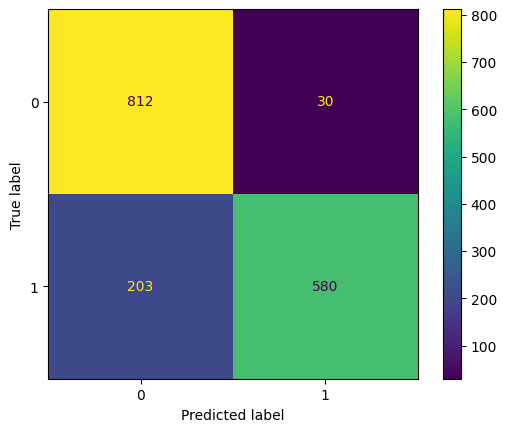

In [136]:
ConfusionMatrixDisplay.from_estimator(Adamodel , X_test , y_test )

In [137]:
print("Roc-Auc-Score:" , roc_auc_score(y_test , y_pred))

Roc-Auc-Score: 0.8525556435295152


* **Ada Model with Dummies**

In [138]:
mushrooms_dummies.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [139]:
X_dum = mushrooms_dummies.drop("class" , axis=1)
y_dum = mushrooms_dummies["class"]

In [140]:
X_dum = pd.get_dummies(X_dum , drop_first=True)

X_dum = X_dum.apply(lambda x : x.astype(int) if x.dtype == "bool" else x)

X_dum.head(3)

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [141]:
map_y_dum = {
    "e" : 0 , 
    "p" : 1
} 
y_dum = y_dum.map(map_y_dum)
y_dum.head(3)

0    1
1    0
2    0
Name: class, dtype: int64

--------------Model Metrics--------------

accuracy score: 0.9341538461538461
roc_auc_score: 0.932388978379641


-----------classification_report-----------

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       842
           1       0.98      0.88      0.93       783

    accuracy                           0.93      1625
   macro avg       0.94      0.93      0.93      1625
weighted avg       0.94      0.93      0.93      1625


-----------------Display-----------------



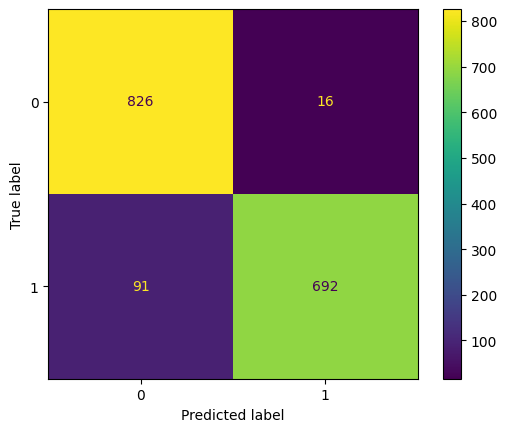

In [142]:
X_train , X_test , y_train , y_test = train_test_split(X_dum , y_dum , test_size=0.2 , random_state=41 , stratify=y_dum)

adamodel = AdaBoostClassifier(n_estimators=3 , algorithm="SAMME")
adamodel.fit(X_train , y_train)
y_pred = adamodel.predict(X_test)

print("--------------Model Metrics--------------")
print()

print("accuracy score:" , accuracy_score(y_test , y_pred))
print("roc_auc_score:" , roc_auc_score(y_test , y_pred))
print()
print()

print("-----------classification_report-----------")
print()

print( classification_report(y_test, y_pred) )
print()

print("-----------------Display-----------------")
print()
print(ConfusionMatrixDisplay.from_estimator(adamodel , X_test , y_test))

* **n_estimator 3 --> 4**

--------------Model Metrics--------------

accuracy score: 0.9341538461538461
roc_auc_score: 0.932388978379641


-----------classification_report-----------

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       842
           1       0.98      0.88      0.93       783

    accuracy                           0.93      1625
   macro avg       0.94      0.93      0.93      1625
weighted avg       0.94      0.93      0.93      1625


-----------------Display-----------------



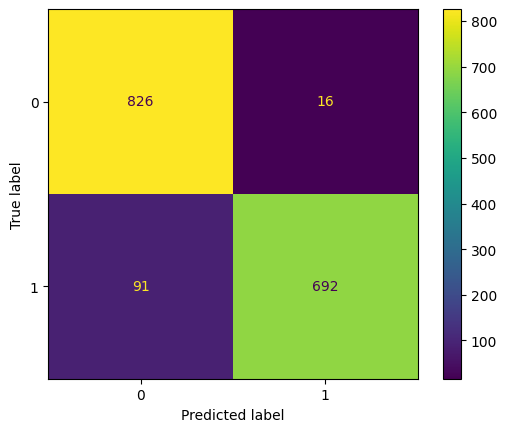

In [143]:
X_train , X_test , y_train , y_test = train_test_split(X_dum , y_dum , test_size=0.2 , random_state=41 , stratify=y_dum)

adamodel = AdaBoostClassifier(n_estimators=4 , algorithm="SAMME")
adamodel.fit(X_train , y_train)
y_pred = adamodel.predict(X_test)

print("--------------Model Metrics--------------")
print()

print("accuracy score:" , accuracy_score(y_test , y_pred))
print("roc_auc_score:" , roc_auc_score(y_test , y_pred))
print()
print()

print("-----------classification_report-----------")
print()

print( classification_report(y_test, y_pred) )
print()

print("-----------------Display-----------------")
print()
print(ConfusionMatrixDisplay.from_estimator(adamodel , X_test , y_test))

* **n_estimator values**

In [144]:
error_rate = []

for i in range(1,30):

    model_ada = AdaBoostClassifier(n_estimators=i)
    model_ada.fit(X_train , y_train)
    predict = model_ada.predict(X_test)

    err = 1 - accuracy_score(y_test , predict)
    error_rate.append(err)

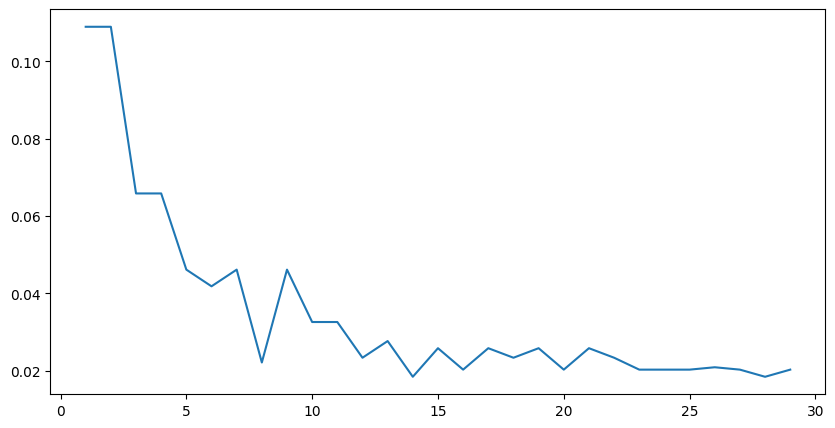

In [145]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,30) , error_rate)

--------------Model Metrics--------------

accuracy score: 0.9815384615384616
roc_auc_score: 0.981290365637978


-----------classification_report-----------

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       842
           1       0.99      0.97      0.98       783

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625


-----------------Display-----------------



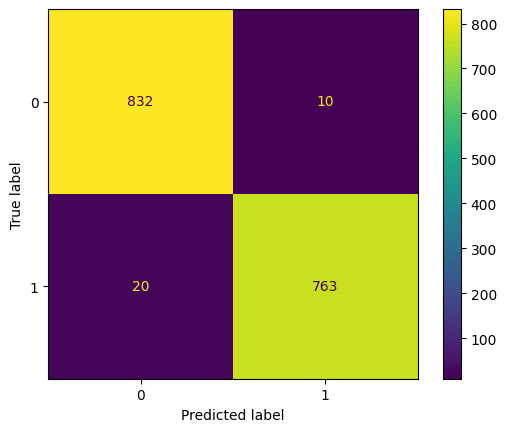

In [146]:
X_train , X_test , y_train , y_test = train_test_split(X_dum , y_dum , test_size=0.2 , random_state=41 , stratify=y_dum)

adamodel = AdaBoostClassifier(n_estimators=14 , algorithm="SAMME")
adamodel.fit(X_train , y_train)
y_pred = adamodel.predict(X_test)

print("--------------Model Metrics--------------")
print()

print("accuracy score:" , accuracy_score(y_test , y_pred))
print("roc_auc_score:" , roc_auc_score(y_test , y_pred))
print()
print()

print("-----------classification_report-----------")
print()

print( classification_report(y_test, y_pred) )
print()

print("-----------------Display-----------------")
print()
print(ConfusionMatrixDisplay.from_estimator(adamodel , X_test , y_test))

In [147]:
coefs = pd.DataFrame(
    index = X_dum.columns , 
    data = adamodel.feature_importances_ , 
    columns=["Coef Values"]
)

In [148]:
coefs

,Coef Values
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [149]:
coefs_columns = coefs[coefs["Coef Values"] > 0 ]
coefs_columns

,Coef Values
odor_c,0.045674
odor_f,0.101940
odor_l,0.089527
odor_n,0.155131
odor_p,0.053869
gill-size_n,0.077147
stalk-surface-above-ring_k,0.122707
spore-print-color_k,0.059094
spore-print-color_n,0.064801
spore-print-color_r,0.090485


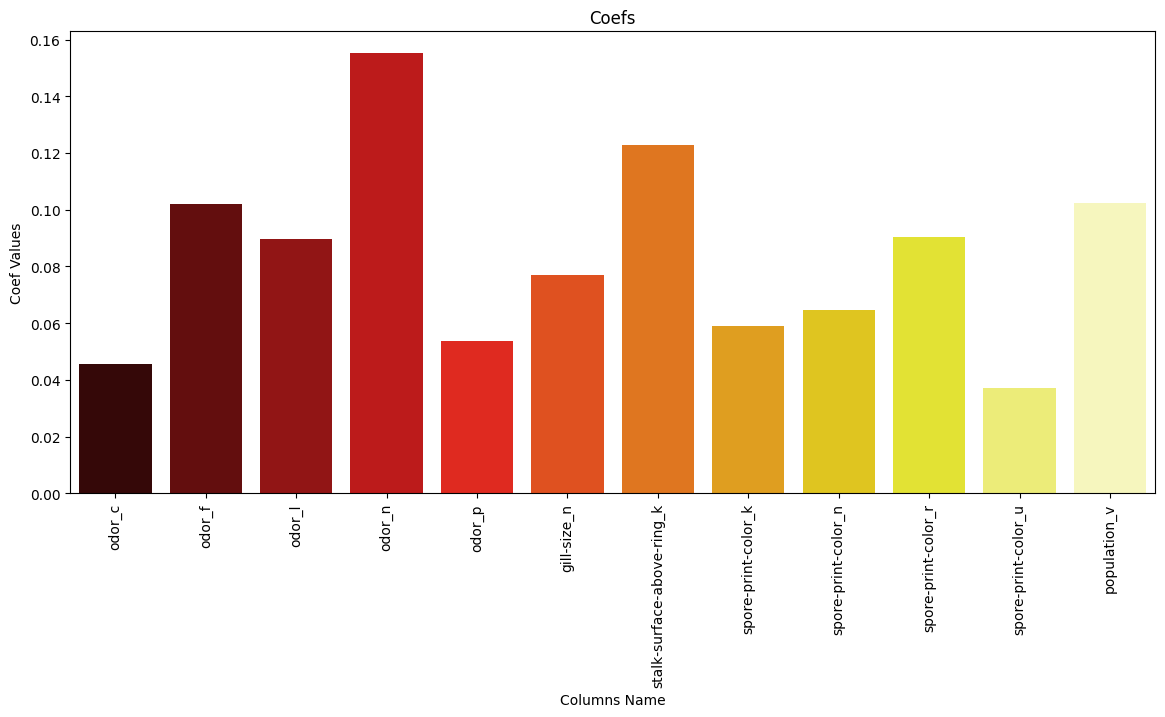

In [150]:
plt.figure(figsize=(14,6))
plt.title("Coefs")
plt.xlabel("Columns Name")
plt.ylabel("Coef Values")
sns.barplot(x=coefs_columns.index , y="Coef Values" , data= coefs_columns , palette="hot")
plt.xticks(rotation = 90)
plt.show()